In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
data = pd.read_csv('housing.csv')

In [78]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [79]:
data.info() ## notice > total_bedrooms there are some Null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [80]:
data['ocean_proximity'].value_counts() ## This is categorical column

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [81]:
## Copying the data in a new dataframe called 'data1', so that few opeations can be seen while keeping intact the data.
data1=data.copy()
data2=data.copy()
data3=data.copy()

####  Dealing with text and categorical Attributes

In [82]:
## Method:1
mapping={'<1H OCEAN':0,'INLAND':1,'NEAR OCEAN':2,'NEAR BAY':3,'ISLAND':4}
data1['ocean_proximity']=data1.ocean_proximity.map(mapping)

In [83]:
print(data1['ocean_proximity'])
data1['ocean_proximity'].unique()

0        3
1        3
2        3
3        3
4        3
        ..
20635    1
20636    1
20637    1
20638    1
20639    1
Name: ocean_proximity, Length: 20640, dtype: int64


array([3, 0, 1, 2, 4], dtype=int64)

In [84]:
##Method:2
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
Ocean_pro_encoded = ordinal_encoder.fit_transform(data2[['ocean_proximity']])
# require 2D data --> data2['ocean_proximity'].values.reshape(-1,1) --> can be passed in place of data2[['ocean_proximity']] 
print(np.unique(Ocean_pro_encoded))
ordinal_encoder.categories_

[0. 1. 2. 3. 4.]


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

One issue with this representation is that ML algo assume that two nearby values are more similar than two distant values.
To fix this problem a common solution is to create one binary attribute per category:viz. one attribute equal to 1 when category is "<1H OCEAN" and 0 otherwise.This is called one hot encoding, because only one attribute will be equal to 1 (hot), while the others will be 0 (cold).

In [85]:
### Method:3
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(sparse=False)
Ocean_pro_encoded_1hot = cat_encoder.fit_transform(data3[['ocean_proximity']])
print(cat_encoder.categories_)
Ocean_pro_encoded_1hot

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

* So this one hot encoder is best suited but one more issue with it, we have to concatenate this transformed columns providing name of columns and manually doing it is cumbersome task.
* pd.get_dummies() --> this function makes life easier.
* https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

In [86]:
df = pd.get_dummies(data, columns=['ocean_proximity'], prefix=['OP'],drop_first=True)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,OP_INLAND,OP_ISLAND,OP_NEAR BAY,OP_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0


### Working on null values

In [87]:
print(df.isnull().sum())
df[df.total_bedrooms.isnull()]

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
OP_INLAND               0
OP_ISLAND               0
OP_NEAR BAY             0
OP_NEAR OCEAN           0
dtype: int64


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,OP_INLAND,OP_ISLAND,OP_NEAR BAY,OP_NEAR OCEAN
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,0,0,1,0
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,0,0,1,0
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,0,0,1,0
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,0,0,1,0
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,0,0,0,1
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,0,0,0,1
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,0,0,0,0
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,0,0,0,0


<AxesSubplot:>

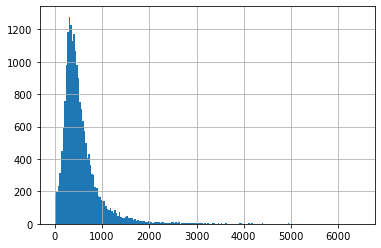

In [88]:
df['total_bedrooms'].hist(bins=200) # Checking the distribution of data in 'total_bedrooms' column

#### Suitable NaN filling methods --> Using data1 for sake of displying the techniques :

In [89]:
## Method one 1 : calculate the median of the column and then use fillna
median_tb=df['total_bedrooms'].median()
df['total_bedrooms']=df.total_bedrooms.fillna(median_tb)
df['total_bedrooms'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Name: total_bedrooms, Length: 20640, dtype: bool

In [90]:
## Method:2 impute function fill all the Nan values in any column with their respective strategy statistics. 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median") ## median is used as strategy
data_num = data2.drop("ocean_proximity", axis=1) ## Leaving the string type column, otherwise it will generate error.
# alternatively: housing_num = housing.select_dtypes(include=[np.number])
imputer.fit(data_num)
imputer.statistics_

array([-1.1849e+02,  3.4260e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1660e+03,  4.0900e+02,  3.5348e+00,  1.7970e+05])

#### We can check, actually it has calculated median of all column and Nan value of respective columns will be replaced with respective median of that column.

In [91]:
data_num.median().values ## Manual checking

array([-1.1849e+02,  3.4260e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1660e+03,  4.0900e+02,  3.5348e+00,  1.7970e+05])

* Imputation has not been done yet. Data has to be transformed as given below.
* One issue with this the result is a 2D  numpy array and we have to again convert it into a dataframe.

In [92]:
X = imputer.transform(data_num)
X

array([[-1.2223e+02,  3.7880e+01,  4.1000e+01, ...,  1.2600e+02,
         8.3252e+00,  4.5260e+05],
       [-1.2222e+02,  3.7860e+01,  2.1000e+01, ...,  1.1380e+03,
         8.3014e+00,  3.5850e+05],
       [-1.2224e+02,  3.7850e+01,  5.2000e+01, ...,  1.7700e+02,
         7.2574e+00,  3.5210e+05],
       ...,
       [-1.2122e+02,  3.9430e+01,  1.7000e+01, ...,  4.3300e+02,
         1.7000e+00,  9.2300e+04],
       [-1.2132e+02,  3.9430e+01,  1.8000e+01, ...,  3.4900e+02,
         1.8672e+00,  8.4700e+04],
       [-1.2124e+02,  3.9370e+01,  1.6000e+01, ...,  5.3000e+02,
         2.3886e+00,  8.9400e+04]])

* Converting back into the dataframe with its previous column names:

In [93]:
data_tr = pd.DataFrame(X, columns=data_num.columns,index=data_num.index)

In [94]:
print(data_tr.head(),'\n\n')
data_tr.info()

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  
0       322.0       126.0         8.3252            452600.0  
1      2401.0      1138.0         8.3014            358500.0  
2       496.0       177.0         7.2574            352100.0  
3       558.0       219.0         5.6431            341300.0  
4       565.0       259.0         3.8462            342200.0   


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------

#### In our case, there is only one column with missing value, using fillna is suitable rather than imputation.
* Returning back to our df and using it for further analysis
* Checking the distribution of whole data set.

In [95]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,OP_INLAND,OP_ISLAND,OP_NEAR BAY,OP_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0


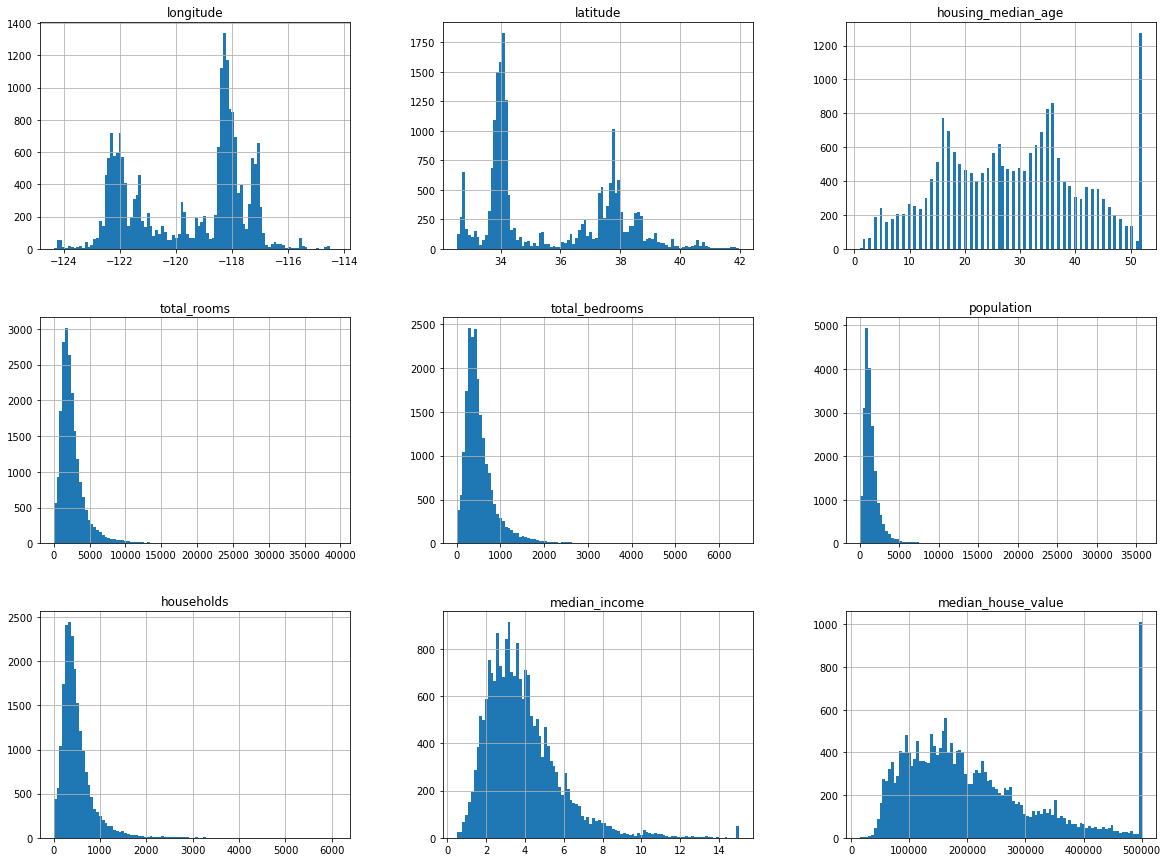

In [96]:
df.iloc[:,:-4].hist(bins=100, figsize=(20,15)) ## Leaving last 4 column as they are one hot encoded for categorical columns
plt.show()

In [97]:
## Calculating correlationg between the features
corr = df.iloc[:,:-4].corr()
corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069120,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066484,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.319026,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927058,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069120,-0.066484,-0.319026,0.927058,1.000000,0.873535,0.974366,-0.007617,0.049457
population,0.099773,-0.108785,-0.296244,0.857126,0.873535,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.974366,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007617,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049457,-0.024650,0.065843,0.688075,1.000000


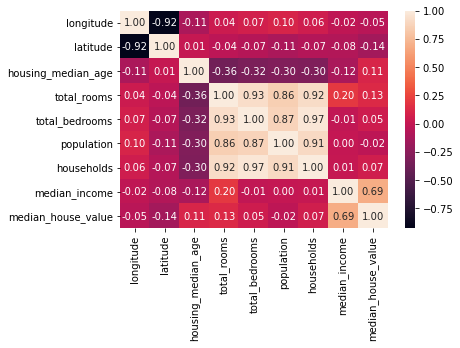

In [98]:
## Plotting heatmap using seaborn
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

In [99]:
corr["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049457
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

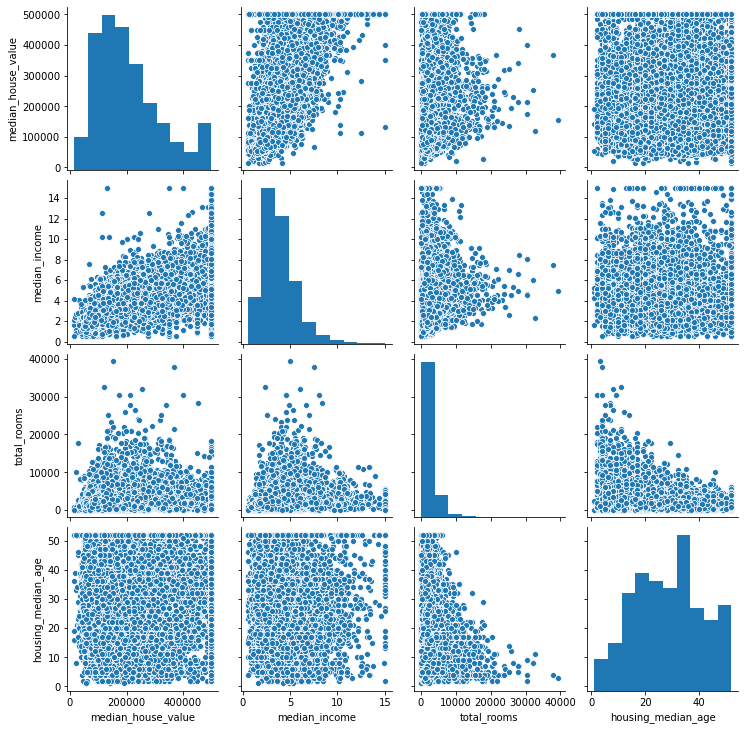

In [100]:
# Showing all pairwise relationships and the distributions of few relevant columns
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
sns.pairplot(df[attributes])

###                               Standard Correlation coefficient of various datasets( wikipedia ) 
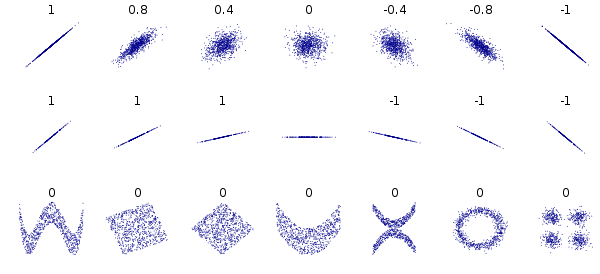

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

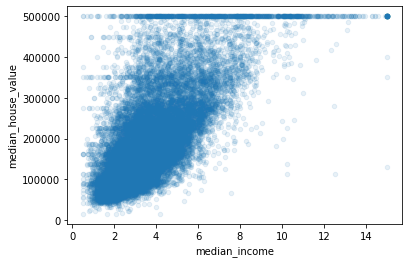

In [103]:
## Again plotting seperately the "median_income", vs "median_house_value
df.plot(kind="scatter", x="median_income", y="median_house_value",alpha=0.1)

#### Visualizing longitude and lattituede with house cluster density and population density 
* Note the plot, even with brightness parameter alpha=0.05, there are some location which are birghter.
* I.e. houses clusters are very close to each other. Houses clusters  are densly situated on those location.   

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

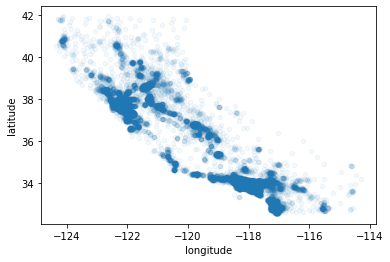

In [104]:
df.plot(kind="scatter", x="longitude", y="latitude",alpha=0.05)

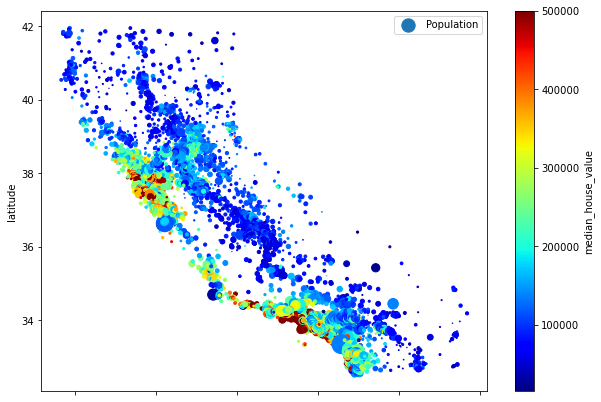

In [139]:
df.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=data_tr['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=True, alpha=1)
plt.legend()
#https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.scatter.html
# Note: s --> size of circles in the figure represents population of those location divided by 100
# Note c--> color mapping is done based on 'median_house_value'.I.e. color represents corresponding median house value as in color bar.

### Combining few features and making new ones (combination should be logical).
####  This step reduces the features and may  improve correlation as well.

In [106]:
df["rooms_per_household"] = df["total_rooms"]/df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"]/df["total_rooms"]
df["population_per_household"]=df["population"]/df["households"]

In [107]:
corr_matrix = df.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)[:-4]

median_house_value          1.000000
median_income               0.688075
OP_NEAR BAY                 0.160284
rooms_per_household         0.151948
OP_NEAR OCEAN               0.141862
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049457
OP_ISLAND                   0.023416
population_per_household   -0.023737
population                 -0.024650
Name: median_house_value, dtype: float64

#### Droping columns which have been already used in combined features.

In [108]:
df=df.drop(['total_rooms','total_bedrooms','population','households'],axis=1)

In [109]:
df.head()

,longitude,latitude,housing_median_age,median_income,median_house_value,OP_INLAND,OP_ISLAND,OP_NEAR BAY,OP_NEAR OCEAN,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,8.3252,452600.0,0,0,1,0,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,8.3014,358500.0,0,0,1,0,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,7.2574,352100.0,0,0,1,0,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,5.6431,341300.0,0,0,1,0,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,3.8462,342200.0,0,0,1,0,6.281853,0.172096,2.181467


### Training and Evaluation

In [110]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [111]:
train_set.head()

,longitude,latitude,housing_median_age,median_income,median_house_value,OP_INLAND,OP_ISLAND,OP_NEAR BAY,OP_NEAR OCEAN,rooms_per_household,bedrooms_per_room,population_per_household
14196,-117.03,32.71,33.0,3.2596,103000.0,0,0,0,1,5.017657,0.200576,3.691814
8267,-118.16,33.77,49.0,3.8125,382100.0,0,0,0,1,4.473545,0.232703,1.738095
17445,-120.48,34.66,4.0,4.1563,172600.0,0,0,0,1,5.645833,0.174486,2.723214
14265,-117.11,32.69,36.0,1.9425,93400.0,0,0,0,1,4.002817,0.258269,3.994366
2271,-119.80,36.78,43.0,3.5542,96500.0,1,0,0,0,6.268421,0.180940,2.300000


### Prepare the data for Machine Learning algorithms

In [112]:
housing_features = train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = train_set["median_house_value"].copy()

In [113]:
housing_features.head()

,longitude,latitude,housing_median_age,median_income,OP_INLAND,OP_ISLAND,OP_NEAR BAY,OP_NEAR OCEAN,rooms_per_household,bedrooms_per_room,population_per_household
14196,-117.03,32.71,33.0,3.2596,0,0,0,1,5.017657,0.200576,3.691814
8267,-118.16,33.77,49.0,3.8125,0,0,0,1,4.473545,0.232703,1.738095
17445,-120.48,34.66,4.0,4.1563,0,0,0,1,5.645833,0.174486,2.723214
14265,-117.11,32.69,36.0,1.9425,0,0,0,1,4.002817,0.258269,3.994366
2271,-119.80,36.78,43.0,3.5542,1,0,0,0,6.268421,0.180940,2.300000


In [114]:
housing_labels

14196    103000.0
8267     382100.0
17445    172600.0
14265     93400.0
2271      96500.0
           ...   
11284    229200.0
11964     97800.0
5390     222100.0
860      283500.0
15795    325000.0
Name: median_house_value, Length: 16512, dtype: float64

In [115]:
housing_features.isnull().any(axis=0)

longitude                   False
latitude                    False
housing_median_age          False
median_income               False
OP_INLAND                   False
OP_ISLAND                   False
OP_NEAR BAY                 False
OP_NEAR OCEAN               False
rooms_per_household         False
bedrooms_per_room           False
population_per_household    False
dtype: bool

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [116]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(housing_features)
feature_prep=scaler.transform(housing_features)
feature_prep

array([[ 1.27258656, -1.3728112 ,  0.34849025, ..., -0.17491646,
        -0.2117846 ,  0.05137609],
       [ 0.70916212, -0.87669601,  1.61811813, ..., -0.40283542,
         0.34218528, -0.11736222],
       [-0.44760309, -0.46014647, -1.95271028, ...,  0.08821601,
        -0.66165785, -0.03227969],
       ...,
       [ 0.59946887, -0.75500738,  0.58654547, ..., -0.60675918,
         0.99951387,  0.02030568],
       [-1.18553953,  0.90651045, -1.07984112, ...,  0.40217517,
        -0.79086209,  0.00707608],
       [-1.41489815,  0.99543676,  1.85617335, ..., -0.85144571,
         1.69520292, -0.08535429]])

In [117]:
scaler.mean_ ## Mean of each column of data

array([-1.19582290e+02,  3.56431492e+01,  2.86082849e+01,  3.88075426e+00,
        3.16557655e-01,  2.42248062e-04,  1.12281977e-01,  1.26332364e-01,
        5.43523502e+00,  2.12857974e-01,  3.09696119e+00])

In [118]:
scaler.var_ ## variance and std of each column of data

array([4.02240251e+00, 4.56506210e+00, 1.58813371e+02, 3.62611573e+00,
       2.16348906e-01, 2.42189378e-04, 9.96747344e-02, 1.10372498e-01,
       5.69921361e+00, 3.36326173e-03, 1.34059196e+02])

### Preparing test set

In [135]:
test_features = test_set.drop("median_house_value", axis=1) # drop labels for training set
test_labels = test_set["median_house_value"].copy()

In [136]:
test_prep=scaler.transform(test_features) ## standardization of test set

### Select and train a model

### 1. linear Regression

In [119]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(feature_prep, housing_labels)

LinearRegression()

In [120]:
# let's try  on a few training instances
some_data = feature_prep[:5]
some_labels = housing_labels.iloc[:5]

print("Predictions:", lin_reg.predict(some_data))
## Compare against the actual values:
print("Labels:", list(some_labels))

Predictions: [200869.11435855 252643.00029058 251565.50212257 165531.02679389
 150396.92181346]
Labels: [103000.0, 382100.0, 172600.0, 93400.0, 96500.0]


In [121]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(feature_prep)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

70576.06649192408

In [122]:
housing_labels

14196    103000.0
8267     382100.0
17445    172600.0
14265     93400.0
2271      96500.0
           ...   
11284    229200.0
11964     97800.0
5390     222100.0
860      283500.0
15795    325000.0
Name: median_house_value, Length: 16512, dtype: float64

In [123]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

51329.68211001996

### 2. Decision Tree

In [124]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(feature_prep, housing_labels)

DecisionTreeRegressor(random_state=42)

In [125]:
housing_predictions = tree_reg.predict(feature_prep)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

* This is overfitting, high variance problem and cannot rely on this result

### Checking with cross value score

In [128]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg,feature_prep, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

#### Making a function which display  accuracies  from cross_val score 

In [129]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [64952.02665991 68686.71238073 67454.19137921 69582.81828614
 71784.50311101 68358.51392805 68114.99493406 66438.3568348
 66443.34614483 68960.85714881]
Mean: 68077.63208075488
Standard deviation: 1809.807605325639


In [130]:
## For Linear Regression
lin_scores = cross_val_score(lin_reg,feature_prep, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [67752.55608931 74114.19990221 70351.54567625 68834.81048949
 72319.46814511 69270.75484379 68140.33517804 72076.52405153
 71398.20845939 72043.63200058]
Mean: 70630.20348357019
Standard deviation: 1982.442600133192


### 3. Ensemble Random forest

In [131]:
feature_prep.shape

(16512, 11)

In [132]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(feature_prep, housing_labels)

RandomForestRegressor(random_state=42)

In [133]:
housing_predictions = forest_reg.predict(feature_prep)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18398.444769282894

In [134]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg,feature_prep, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [46717.56990083 51077.14491069 49299.0248493  50066.39413422
 52694.93860211 46533.05341726 47214.00136137 50381.95294327
 48479.8912312  50011.33918795]
Mean: 49247.53105382013
Standard deviation: 1904.4478490120975


### 4. Support vector regressor

In [56]:
from sklearn.svm import SVR
svm_reg = SVR(kernel="linear")
svm_reg.fit(feature_prep, housing_labels)
housing_predictions = svm_reg.predict(feature_prep)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

108773.03050968294

In [57]:
svmr_scores = cross_val_score(svm_reg,feature_prep, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
svm_rmse_scores = np.sqrt(-svmr_scores)
display_scores(svm_rmse_scores)

Scores: [110142.92957628 112793.47258325 110479.30497145 105917.67766571
 109497.03475627 110710.33050503 107039.65583982 108217.04849719
 110383.38838371 111424.86734684]
Mean: 109660.571012555
Standard deviation: 1960.7196928263493


In [58]:
feature_prep.shape

(16512, 11)

### We can see random forest is the winner among all the alogorithm for this problem.
#### Now testing accuracy on test set:

In [137]:
test_predictions = forest_reg.predict(test_prep)
forest_mse = mean_squared_error(test_labels, test_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

50051.578341801796

## Fine tune your model: 
### 1. Grid Search
Fiddling with the hperparameters is not good idea.Instead we can use sklearn grid search.We need to tell which hyperparameters we want to experiment with and what values to try out, and it will evaluate all the possible combinations of hyperparameters values, using cross-validation.  finally provides best combinations.
* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
### Trying it with RandomForestRegressor:
###   
    * Try 20 (4×5) combinations of hyperparameters
    * Then try 6 (2×3) combinations with bootstrap set as False

In [140]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators': [3, 10, 30,50],'max_features':[2,4,6,8,11]},
     {'bootstrap':[False],'n_estimators':[3,10],'max_features': [2,3,4]}]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (20+6)*5=130 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(feature_prep, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8, 11],
                          'n_estimators': [3, 10, 30, 50]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [141]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 50}

In [142]:
grid_search.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=50, random_state=42)

In [143]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

58534.13980695128 {'max_features': 2, 'n_estimators': 3}
51265.50525697493 {'max_features': 2, 'n_estimators': 10}
48838.180266924195 {'max_features': 2, 'n_estimators': 30}
48582.888138182774 {'max_features': 2, 'n_estimators': 50}
57849.13012451486 {'max_features': 4, 'n_estimators': 3}
50938.05168968712 {'max_features': 4, 'n_estimators': 10}
49009.653257234975 {'max_features': 4, 'n_estimators': 30}
48574.13612675739 {'max_features': 4, 'n_estimators': 50}
58193.72555982727 {'max_features': 6, 'n_estimators': 3}
51531.3563694179 {'max_features': 6, 'n_estimators': 10}
49505.723836565245 {'max_features': 6, 'n_estimators': 30}
49239.04550926516 {'max_features': 6, 'n_estimators': 50}
57349.18881711423 {'max_features': 8, 'n_estimators': 3}
51709.746679878765 {'max_features': 8, 'n_estimators': 10}
49802.2187955751 {'max_features': 8, 'n_estimators': 30}
49509.414514564145 {'max_features': 8, 'n_estimators': 50}
57751.181822721286 {'max_features': 11, 'n_estimators': 3}
52434.4501314

In [63]:
# pd.DataFrame(grid_search.cv_results_) # check it

In [144]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([8.26480283e-02, 7.68504087e-02, 4.99695825e-02, 3.43989017e-01,
       1.42035605e-01, 2.08139801e-04, 4.12747286e-03, 5.48675338e-03,
       7.03147335e-02, 1.03465818e-01, 1.20904441e-01])

In [145]:
sum(feature_importances)

1.0

In [146]:
## Findig best 4 features as recommended by grid search
print(np.round(feature_importances,3),'\n\n')
print(housing_features.columns,'\n')
pd.Series(np.round(feature_importances,3),index=housing_features.columns).sort_values(ascending=False)[:4]

[0.083 0.077 0.05  0.344 0.142 0.    0.004 0.005 0.07  0.103 0.121] 


Index(['longitude', 'latitude', 'housing_median_age', 'median_income',
       'OP_INLAND', 'OP_ISLAND', 'OP_NEAR BAY', 'OP_NEAR OCEAN',
       'rooms_per_household', 'bedrooms_per_room', 'population_per_household'],
      dtype='object') 



median_income               0.344
OP_INLAND                   0.142
population_per_household    0.121
bedrooms_per_room           0.103
dtype: float64

* Now  we can use random forest with these 4 feature and 50 estimators as our final model.
* We can try for more combination of parameters to  improve the accuracy.

### 2. Randomized search
* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

In [147]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=20, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(feature_prep, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=20,
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000000D3CEC50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000000D3CE2B0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [148]:
rnd_search.best_params_

{'max_features': 3, 'n_estimators': 150}

In [149]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

48893.28629738839 {'max_features': 7, 'n_estimators': 180}
50614.760038952365 {'max_features': 5, 'n_estimators': 15}
48363.92508946278 {'max_features': 3, 'n_estimators': 72}
49748.0054756759 {'max_features': 5, 'n_estimators': 21}
49003.067786984524 {'max_features': 7, 'n_estimators': 122}
48322.56124618463 {'max_features': 3, 'n_estimators': 75}
48303.2888858699 {'max_features': 3, 'n_estimators': 88}
48536.54704016094 {'max_features': 5, 'n_estimators': 100}
48095.37019493916 {'max_features': 3, 'n_estimators': 150}
61571.31087001121 {'max_features': 5, 'n_estimators': 2}
48136.250381788595 {'max_features': 4, 'n_estimators': 158}
48683.303521747985 {'max_features': 6, 'n_estimators': 130}
49493.035530813955 {'max_features': 4, 'n_estimators': 21}
48967.98191562156 {'max_features': 1, 'n_estimators': 58}
48780.451174688285 {'max_features': 6, 'n_estimators': 89}
48959.43593807349 {'max_features': 1, 'n_estimators': 59}
48909.633944161396 {'max_features': 7, 'n_estimators': 170}
481

In [150]:
feature_importances = rnd_search.best_estimator_.feature_importances_
feature_importances

array([9.04176647e-02, 8.95074147e-02, 5.04460455e-02, 3.15155870e-01,
       1.45010705e-01, 2.38712816e-04, 4.46814640e-03, 6.44011197e-03,
       8.11862592e-02, 1.01287909e-01, 1.15841161e-01])